In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/amazon.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [4]:
df.shape

(1465, 16)

In [5]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08HDJ86NZ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


## Data Cleaning & Pre Processing:

In [6]:
def clean_values(value):
    # Split the value by comma and return the first part (User ID or User Name)
    return value.split(',')[0].strip()  # Change the index to [1] for User Name if needed

# Apply the function to clean up each column
df['user_id'] = df['user_id'].apply(clean_values)
df['user_name'] = df['user_name'].apply(clean_values)
df['review_id'] = df['review_id'].apply(clean_values)
df['review_title'] = df['review_title'].apply(clean_values)

In [7]:
df.sample(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
514,B08Y1SJVV5,pTron Solero MB301 3A Micro USB Data & Chargin...,Computers&Accessories|Accessories&Peripherals|...,₹99,₹666.66,85%,3.9,"24,870",Fast Charging & Data Sync: Solero MB301 micro ...,AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,Jayesh,R7S8ANNSDPR40,It's pretty good,"It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31ew3okQR2...,https://www.amazon.in/Solero-MB301-Charging-48...
1428,B078JT7LTD,"Sujata Dynamix, Mixer Grinder, 900 Watts, 3 Ja...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹6,120","₹8,073",24%,4.6,"2,751",Warranty: 2 year warranty provided by the manu...,AGS4ODHNPY3TQGAIJFDY4I33URHA,Tengop,R1LBKT3YDVVW86,Good product,Got it with intact packaging open it up the mo...,https://m.media-amazon.com/images/I/415634DtKf...,https://www.amazon.in/Sujata-Dynamix-900W-900-...
715,B07KR5P3YD,Zebronics Wired Keyboard and Mouse Combo with ...,Computers&Accessories|Accessories&Peripherals|...,₹448,₹699,36%,3.9,"17,348","Keyboard : Standard keyboard|Rupee key, Comfor...",AE35OI7LDTOKU32IFQ3GQX5AOKFQ,lucky,R1JXCQXDJH1CEV,light weight okay in this price range,design of the keyboard and mouse lenght of the...,https://m.media-amazon.com/images/I/3164hjUSFd...,https://www.amazon.in/Zebronics-Zeb-JUDWAA-750...


In [8]:
# finding unique values of customer_id
df['user_id'].value_counts()

user_id
AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA    10
AECPFYFQVRUWC3KGNLJIOREFP5LQ     8
AGAELRYPMTG5SADZPDYB343EASAA     8
AG3D6O4STAQKAY2UVGEUV46KN35Q     8
AEWAZDZZJLQUYVOVGBEUKSLXHQ5A     7
                                ..
AE3PTJFRVU3YM5YFYN3ICDA5X6FA     1
AEDZXGGZW3ZS22XINYAPXX347GKA     1
AF3GETWWBGMLASY2KKNNBS2VO6DQ     1
AEEYJCTR44VPW4DW537EAZHK5CPQ     1
AHCS34T4DOHWPNKZ2G3W76AITIKA     1
Name: count, Length: 1170, dtype: int64

In [9]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [10]:
df = df.dropna()

Lets extract main features required for the model building and removing features like image link, product link and so on. 

In [ ]:
main_feature4m_df = df[['user_id', 'product_id', 'product_name', 'about_product', 'category', 'rating', 'rating_count', 'discounted_price', 'actual_price', 'review_title', 'review_content']]

In [ ]:
main_feature4m_df.rating.unique()

> We can see that there is an unexpected reting value shown like '|' which has no meaning in it. So, we are going to igonere that part of data.

In [ ]:
# removing the rows with rating | error terms
main_feature4m_df.shape

In [ ]:
# cleaning the ratings column which has unwanted values "|" as rating.
main_feature4m_df = main_feature4m_df[main_feature4m_df['rating'] != '|']
main_feature4m_df.shape

In [ ]:
main_feature4m_df.dtypes

We also have to convert this data types into appropriate formation.

In [ ]:
# converting the column to appropriate data type from object
main_feature4m_df['rating'] = main_feature4m_df['rating'].astype(float)
main_feature4m_df['rating_count'] = main_feature4m_df['rating_count'].str.replace(",",'')  # removing , from the numbers
main_feature4m_df['rating_count'] = main_feature4m_df['rating_count'].astype('float64')  
main_feature4m_df['discounted_price'] = main_feature4m_df['discounted_price'].str.replace("₹",'')
main_feature4m_df['discounted_price'] = main_feature4m_df['discounted_price'].str.replace(",",'')
main_feature4m_df['discounted_price'] = main_feature4m_df['discounted_price'].astype('float64')
main_feature4m_df['actual_price'] = main_feature4m_df['actual_price'].str.replace("₹",'')
main_feature4m_df['actual_price'] = main_feature4m_df['actual_price'].str.replace(",",'')
main_feature4m_df['actual_price'] = main_feature4m_df['actual_price'].astype('float64')
main_feature4m_df['user_id'] = main_feature4m_df['user_id'].astype(str)
main_feature4m_df['product_id'] = main_feature4m_df['product_id'].astype(str)
main_feature4m_df['category'] = main_feature4m_df['category'].astype(str)
main_feature4m_df['product_name'] = main_feature4m_df['product_name'].astype(str)
main_feature4m_df['about_product'] = main_feature4m_df['about_product'].astype(str)
main_feature4m_df['review_title'] = main_feature4m_df['review_title'].astype(str)
main_feature4m_df['review_content'] = main_feature4m_df['review_content'].astype(str)

main_feature4m_df.dtypes

Now, cleaning the category column.

In [ ]:
# checking category 
main_feature4m_df['category'].head(3)

In [ ]:
nw_cat = main_feature4m_df['category'].str.split('|', expand=True)
nw_cat

In [ ]:
# adding the 2 new columns to the main dataframe
nw_cat['category_1'] = nw_cat[0]
nw_cat['category_2'] = nw_cat[1]

In [ ]:
main_feature4m_df.drop('category', axis=1, inplace=True)
main_feature4m_df['category_1'] = nw_cat['category_1']
main_feature4m_df['category_2'] = nw_cat['category_2']

In [ ]:
main_feature4m_df["category_1"].value_counts()

In [ ]:
main_feature4m_df["category_2"].value_counts()

In [ ]:
main_feature4m_df.isna().sum()

In [ ]:
main_feature4m_df['category_1'] = main_feature4m_df['category_1'].str.replace('&', 'and')
main_feature4m_df['category_1'] = main_feature4m_df['category_1'].str.replace('OfficeProducts', 'Office Products')
main_feature4m_df['category_1'] = main_feature4m_df['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
main_feature4m_df['category_1'] = main_feature4m_df['category_1'].str.replace('HomeImprovement', 'Home Improvement')

main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('&', 'and')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace(',', ', ')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeAppliances', 'Home Appliances')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('AirQuality', 'Air Quality')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('ExternalDevices', 'External Devices')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('DataStorage', 'Data Storage')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeStorage', 'Home Storage')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeAudio', 'Home Audio')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('CraftMaterials', 'Craft Materials')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('PowerAccessories', 'Power Accessories')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('CarAccessories', 'Car Accessories')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
main_feature4m_df['category_2'] = main_feature4m_df['category_2'].str.replace('HomeTheater', 'Home Theater')

In [ ]:
main_feature4m_df.sample(3)

In [ ]:
main_feature4m_df.shape

# EDA & Data Visualization:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
sns.set_palette('bright')

# Create multiple visualizations
# plt.figure(figsize=(10, 30))

# Plotting a bar chart of product categories
plt.subplot(1, 2, 1)
sns.countplot(data=main_feature4m_df, y='category_1')
plt.title('Product Categories')
plt.xlabel('Count')

In [ ]:
# Set the color palette
sns.set_palette('bright')

# Create multiple visualizations
plt.figure(figsize=(15, 15))

# Plotting a bar chart of product categories
plt.subplot(1, 2, 1)
sns.countplot(data=main_feature4m_df, y='category_2')
plt.title('Product Categories')
plt.xlabel('Count')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='rating', y='discounted_price', data=main_feature4m_df)
plt.title('rating vs. Discount Price')
plt.show()

In [ ]:
from textblob import TextBlob

# Classify Sentiment 
def senti_als(text):
    analysis = TextBlob(text)
    # threshold for positive & negetive polarity
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negetive'
    else:
        return 'Neutral'
    
    
# apply sentiment analysis on review_content

sentimen = main_feature4m_df['review_content'].apply(senti_als)
sentiment_count = sentimen.value_counts()

# plot the bar 

sentiment_count.plot(kind='bar',color=['green','blue','red'],title="Sentiment analysis on review content")
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

scorce: [https://www.kaggle.com/code/sauravdas07/recommendation-engine-3-0#Preprocess-the-data](http://)

Making Word cloud for insights about reviews of customers.

In [ ]:
from wordcloud import WordCloud

product_text = ' '.join(main_feature4m_df['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(product_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# actual price vs rating
sns.scatterplot(ax=axes[0], data=main_feature4m_df, x='actual_price', y='rating', size='rating_count', alpha=0.5)
axes[0].set_title('Actual Price vs Rating')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Average Rating')
axes[0].set_xscale('log')
axes[0].grid(True)

# discounted price vs rating
sns.scatterplot(ax=axes[1], data=main_feature4m_df, x='discounted_price', y='rating', size='rating_count', alpha=0.5)
axes[1].set_title('Discounted Price vs Rating')
axes[1].set_xlabel('Discounted Price')
axes[1].set_ylabel('Average Rating')
axes[1].set_xscale('log')  
axes[1].grid(True)

plt.show()

In [ ]:
import plotly.express as px

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(main_feature4m_df, x='actual_price', y='discounted_price', z='rating', color='rating',
                     hover_data=['product_name'], title='Interactive 3D Scatter Plot')
fig.show()

## 1. Content Based Filtering Recommender System 

In essence, content-based recommender systems are those that leverage user recommendations derived from item descriptions. Content-based systems operate under the premise that if a user has responded favorably to goods with particular characteristics, she needs to have an interest in things that are comparable and said to share those characteristics. The most popular ways to characterize an item's features are with keywords and their weights, which indicate how crucial the keywords are to the item's description.

It uses following formula in order to calculate similarity.

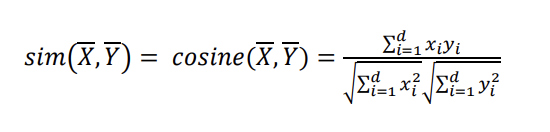


In [ ]:
main_feature4m_df['product_details'] = main_feature4m_df['product_name'] + ' ' + main_feature4m_df['about_product'] + ' ' + main_feature4m_df['about_product'] + ' ' + main_feature4m_df['review_content']

In [ ]:
main_feature4m_df['product_details'] = main_feature4m_df['product_details'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words='english',max_df=0.95,min_df=2,ngram_range=(1,1))
tfidf_matrix = tfidf_vec.fit_transform(main_feature4m_df['product_details'])

In [ ]:
# tfidf_matrix is a sparse matrix means it has lot of zeros in it.
tfidf_matrix.shape

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
sim_score = 0

def content_based_recommendations(product_id, data, cosine_sim, n=5):
    idx = data[data['product_id'] == product_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    product_indices = [i[0] for i in sim_scores]
    return data.iloc[product_indices], sim_scores

content_based_recommendations, p_sim_score = content_based_recommendations('B09LHXNZLR', main_feature4m_df, cosine_sim)

In [ ]:
content_based_recommendations

In [ ]:
# finding ground truth score using ratings
recommended_product_ids = content_based_recommendations['product_id'].tolist()
ratings_for_recommended_items = main_feature4m_df[main_feature4m_df['product_id'].isin(recommended_product_ids)]

# Define a threshold for considering an item as relevant (e.g., 4 or 5 stars)
threshold = 4

# Assign binary relevance labels based on the threshold
ground_truth = [1 if rating >= threshold else 0 for rating in ratings_for_recommended_items['rating']]

predicted_scores = [tup[1] for tup in p_sim_score]
print("Predicted Relevance Scores:", predicted_scores)

**The evaluation** involves calculation of average precision for a recommended list of length N defined as follows:

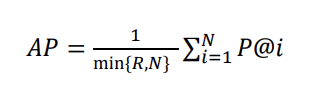

where R is the total number of relevant items in the repository. In the case that R is less than N, averaging the precision values by R instead of N is more intuitive as otherwise a recommender system would be wrongfully penalized for recommending N items even if it correctly places all R relevant items to the top of the recommended list.

In [ ]:
from sklearn.metrics import average_precision_score

ap = average_precision_score(ground_truth, predicted_scores)
print("Average Precision (AP):", ap)

## 2. Collaborative Filtering Recommendations

Collaborative filtering is a recommendation system technique that suggests items to users based on the preferences of other users. Instead of analyzing item attributes, collaborative filtering relies on the patterns of user interactions with items to make recommendations. 

In [ ]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(main_feature4m_df[['user_id', 'product_id', 'rating']], reader)

# Split dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build and train user-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': True}  # User-based CF model meaning that the similarity is calculated between users
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Evaluate model
accuracy.rmse(predictions)
accuracy.mae(predictions)

In [ ]:
predictions[0:5]

For the first prediction, the model estimated the rating for user 'AHH26HAPTOI5Z52DFLNYU5TOLWCQ' for item 'B08M66K48D' to be approximately 4.097. However, the actual rating ('r_ui') was 4.3. 

Similarly, for the second and third predictions, the model estimated the ratings for the corresponding users and items to be approximately 4.097, but the actual ratings were 3.8 and 4.0, respectively. 

# Singular Value Decomposition (SVD)
SVD is a matrix factorization technique commonly used in collaborative filtering to reduce the dimensionality of the user-item interaction matrix and uncover latent factors that capture underlying patterns in the data. It decomposes the user-item interaction matrix into three matrices: U, Σ, and V^T, where U represents user features, Σ represents singular values, and V^T represents item features.

Matrix factorization is a dimensionality reduction technique used in collaborative filtering. The idea is to represent the user-item interaction matrix as the product of two lower-dimensional matrices: one representing users and the other representing items. These matrices are called user and item latent factor matrices.

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(main_feature4m_df[['user_id', 'product_id', 'rating']], reader)

# Split dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
algo = SVD()
algo.fit(trainset)

# Make predictions for test set
predictions = algo.test(testset)

# Evaluate predictions
accuracy.rmse(predictions)

# Print a few example predictions
for prediction in predictions[:5]:
    print('User:', prediction.uid)
    print('Item:', prediction.iid)
    print('Actual Rating:', prediction.r_ui)
    print('Predicted Rating:', prediction.est)
    print()

The performance of the collaborative filtering model is evaluated using metrics such as Root Mean Squared Error (RMSE) or Mean Absolute Error (MAE), which measure the difference between predicted and actual ratings on a test set. Here, Ratings serve as indicators of user satisfaction or interest in the items, and they form the basis for making personalized recommendations to users.

In [ ]:
# Run cross-validation to evaluate the model
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print results
print("Mean RMSE:", results['test_rmse'].mean())
print("Mean MAE:", results['test_mae'].mean())